In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
df = pd.read_csv("../../Raw Data/drivers.csv",encoding = "ISO-8859-1")

In [3]:
df.head(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


In [4]:
df = df.loc[df["nationality"] != "British"]
df = df.loc[df["nationality"] != "American"]

In [5]:
#Seleccionamos las columnas que nos interesan
selected_columns = df[["surname","dob",]]
df = selected_columns.copy()
df.head(3)

,surname,dob
1,Heidfeld,1977-05-10
2,Rosberg,1985-06-27
3,Alonso,1981-07-29


In [6]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head(3)

,surname,dob,year,month,day
1,Heidfeld,1977-05-10,1977,5,10
2,Rosberg,1985-06-27,1985,6,27
3,Alonso,1981-07-29,1981,7,29


In [7]:
df['Deporte'] = 'Formula-1'

In [8]:
df.head(3)

,surname,dob,year,month,day,Deporte
1,Heidfeld,1977-05-10,1977,5,10,Formula-1
2,Rosberg,1985-06-27,1985,6,27,Formula-1
3,Alonso,1981-07-29,1981,7,29,Formula-1


In [9]:
df = df.loc[df["year"] > 1950]

In [10]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4  

In [11]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

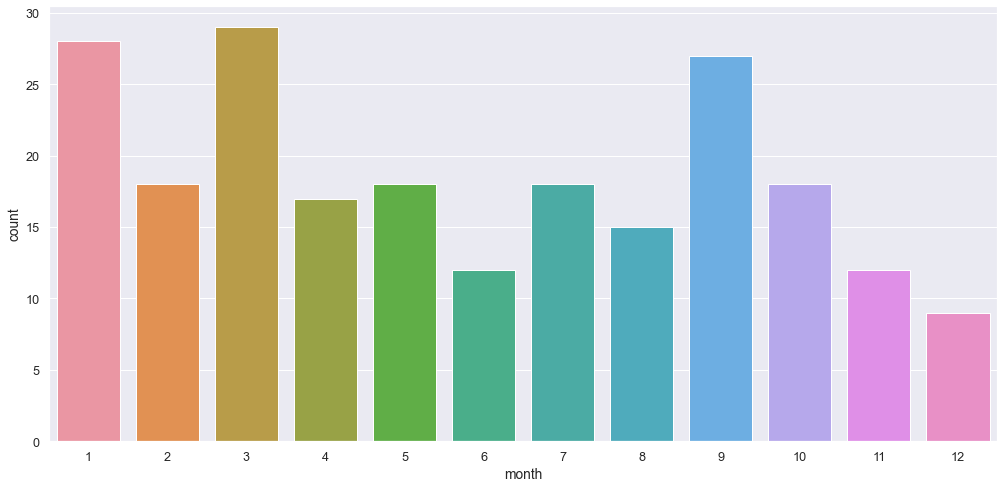

In [12]:
ax = sns.countplot(x="month", data=df)

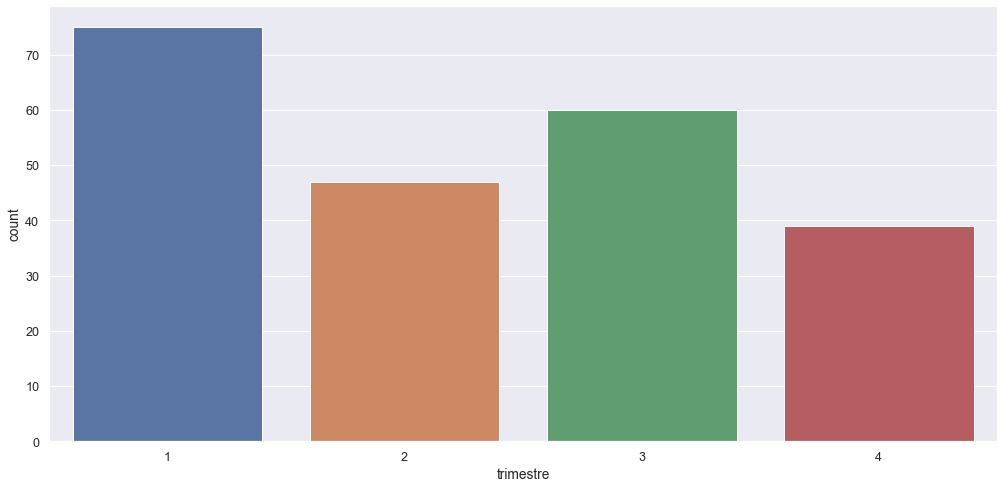

In [13]:
ax = sns.countplot(x="trimestre", data=df)

In [14]:
df.to_csv('../../Data/pilotosf1.csv', encoding='utf-8')